#Importing libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
import pandas as pd
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools

#Setting for GPU

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

#Model 1

In [4]:
class Model1(nn.Module):
  def __init__(self):
    super(Model1, self).__init__()
    self.conv1 = nn.Conv2d(3, 8, 11, 4, 0)
    self.pool1 = nn.MaxPool2d(3, 2)
    self.conv2 = nn.Conv2d(8, 16, 5, 1, 0)
    self.pool2 = nn.MaxPool2d(3, 2)
    self.fc1 = nn.Linear(16 * 10 * 10, 128)
    self.fc2 = nn.Linear(128, 5)
    self.relu = nn.ReLU()
    self.softmax = nn.Softmax(1)

  def forward(self, x):
    x = self.conv1(x)
    x = self.pool1(x)
    x = self.conv2(x)
    x = self.pool2(x)
    x = x.view(-1, 16 * 10 * 10)
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    x = self.softmax(x)
    return x

model1 = Model1().to(device)
print(model1)

Model1(
  (conv1): Conv2d(3, 8, kernel_size=(11, 11), stride=(4, 4))
  (pool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1600, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=5, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)


#Model 2

In [5]:
class Model2(nn.Module):
  def __init__(self):
    super(Model2, self).__init__()
    self.conv1 = nn.Conv2d(3, 8, 11, 4, 0)
    self.pool1 = nn.MaxPool2d(3, 2)
    self.conv2 = nn.Conv2d(8, 16, 5, 1, 0)
    self.pool2 = nn.MaxPool2d(3, 2)
    self.conv3 = nn.Conv2d(16, 32, 3, 1, 0)
    self.pool3 = nn.MaxPool2d(3, 2)
    self.fc1 = nn.Linear(32 * 3 * 3, 128)
    self.fc2 = nn.Linear(128, 5)
    self.relu = nn.ReLU()
    self.softmax = nn.Softmax(1)

  def forward(self, x):
    x = self.conv1(x)
    x = self.pool1(x)
    x = self.conv2(x)
    x = self.pool2(x)
    x = self.conv3(x)
    x = self.pool3(x)
    x = x.view(-1, 32 * 3 * 3)
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    x = self.softmax(x)
    return x

model2 = Model2().to(device)
print(model2)




Model2(
  (conv1): Conv2d(3, 8, kernel_size=(11, 11), stride=(4, 4))
  (pool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=288, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=5, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)


#Model 3

In [6]:
class Model3(nn.Module):
  def __init__(self):
    super(Model3, self).__init__()
    self.conv1 = nn.Conv2d(3, 8, 11, 4, 0)
    self.pool1 = nn.MaxPool2d(3, 2)
    self.conv2 = nn.Conv2d(8, 16, 5, 1, 0)
    self.pool2 = nn.MaxPool2d(3, 2)
    self.conv3 = nn.Conv2d(16, 32, 3, 1, 0)
    self.conv4 = nn.Conv2d(32, 64, 3, 1, 0)
    self.pool4 = nn.MaxPool2d(3, 2)
    self.fc1 = nn.Linear(64 * 2 * 2, 128)
    self.fc2 = nn.Linear(128, 5)
    self.relu = nn.ReLU()
    self.softmax = nn.Softmax(1)

  def forward(self, x):
    x = self.conv1(x)
    x = self.pool1(x)
    x = self.conv2(x)
    x = self.pool2(x)
    x = self.conv3(x)
    x = self.conv4(x)
    x = self.pool4(x)
    x = x.view(-1, 64 * 2 * 2)
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    x = self.softmax(x)
    return x

model3 = Model3().to(device)
print(model3)

Model3(
  (conv1): Conv2d(3, 8, kernel_size=(11, 11), stride=(4, 4))
  (pool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=5, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)


#Loss function and Optimizer

In [7]:
loss_fn = nn.CrossEntropyLoss()
optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.001)
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.001)
optimizer3 = torch.optim.Adam(model3.parameters(), lr=0.001)

#Loading Image

In [8]:


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_data = datasets.ImageFolder('/content/drive/MyDrive/Data/train', transform=transform)
val_data = datasets.ImageFolder('/content/drive/MyDrive/Data/val', transform=transform)
test_data = datasets.ImageFolder('/content/drive/MyDrive/Data/test', transform=transform)

train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=True)

#Functions to train CNN

In [9]:
def train_epoch(model, dataloader, loss_fn, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for batch_idx, (data, target) in enumerate(dataloader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
    train_loss = running_loss / len(dataloader)
    train_accuracy = 100 * correct / total
    return train_loss, train_accuracy


def validate_epoch(model, dataloader, loss_fn, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in dataloader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = loss_fn(output, target)
            running_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    val_loss = running_loss / len(dataloader)
    val_accuracy = 100 * correct / total
    return val_loss, val_accuracy


def training_CNN(model, train_dataloader, val_dataloader, loss_fn, optimizer, device, train_list, val_list, patience=20):
    num_epochs = 100
    best_val_loss = float('inf')
    patience_counter = 0

    for epoch in range(num_epochs):
        train_loss, train_accuracy = train_epoch(model, train_dataloader, loss_fn, optimizer, device)
        val_loss, val_accuracy = validate_epoch(model, val_dataloader, loss_fn, device)
        train_list.append(train_accuracy)
        val_list.append(val_accuracy)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1

        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, '
              f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

        if patience_counter >= patience:
            print(f'Early stopping at epoch {epoch+1} due to no improvement in validation loss for {patience} consecutive epochs.')
            break


#Training Model 1

In [10]:
train_list1 = []
val_list1 = []
training_CNN(model1, train_dataloader, val_dataloader, loss_fn, optimizer1, device, train_list1, val_list1)

Epoch [1/100], Train Loss: 1.5407, Train Accuracy: 33.60%, Val Loss: 1.4274, Val Accuracy: 40.00%
Epoch [2/100], Train Loss: 1.4318, Train Accuracy: 44.40%, Val Loss: 1.3704, Val Accuracy: 56.00%
Epoch [3/100], Train Loss: 1.3408, Train Accuracy: 56.00%, Val Loss: 1.2939, Val Accuracy: 62.00%
Epoch [4/100], Train Loss: 1.2833, Train Accuracy: 64.40%, Val Loss: 1.3221, Val Accuracy: 60.00%
Epoch [5/100], Train Loss: 1.2469, Train Accuracy: 65.20%, Val Loss: 1.3145, Val Accuracy: 60.00%
Epoch [6/100], Train Loss: 1.1900, Train Accuracy: 72.80%, Val Loss: 1.2824, Val Accuracy: 60.00%
Epoch [7/100], Train Loss: 1.1480, Train Accuracy: 77.20%, Val Loss: 1.2826, Val Accuracy: 64.00%
Epoch [8/100], Train Loss: 1.0928, Train Accuracy: 82.40%, Val Loss: 1.1807, Val Accuracy: 70.00%
Epoch [9/100], Train Loss: 1.0611, Train Accuracy: 85.60%, Val Loss: 1.1701, Val Accuracy: 72.00%
Epoch [10/100], Train Loss: 1.0486, Train Accuracy: 85.60%, Val Loss: 1.2157, Val Accuracy: 68.00%
Epoch [11/100], Tra

#Training Model 2

In [11]:
train_list2 = []
val_list2 = []
training_CNN(model2, train_dataloader, val_dataloader, loss_fn, optimizer2, device, train_list2, val_list2)

Epoch [1/100], Train Loss: 1.5614, Train Accuracy: 30.80%, Val Loss: 1.5571, Val Accuracy: 26.00%
Epoch [2/100], Train Loss: 1.4729, Train Accuracy: 38.80%, Val Loss: 1.4533, Val Accuracy: 44.00%
Epoch [3/100], Train Loss: 1.4068, Train Accuracy: 48.40%, Val Loss: 1.3978, Val Accuracy: 52.00%
Epoch [4/100], Train Loss: 1.3582, Train Accuracy: 51.20%, Val Loss: 1.3821, Val Accuracy: 42.00%
Epoch [5/100], Train Loss: 1.3225, Train Accuracy: 58.80%, Val Loss: 1.3664, Val Accuracy: 52.00%
Epoch [6/100], Train Loss: 1.2975, Train Accuracy: 60.40%, Val Loss: 1.4013, Val Accuracy: 52.00%
Epoch [7/100], Train Loss: 1.2640, Train Accuracy: 65.60%, Val Loss: 1.3071, Val Accuracy: 58.00%
Epoch [8/100], Train Loss: 1.2303, Train Accuracy: 67.60%, Val Loss: 1.3090, Val Accuracy: 60.00%
Epoch [9/100], Train Loss: 1.2103, Train Accuracy: 70.80%, Val Loss: 1.3331, Val Accuracy: 56.00%
Epoch [10/100], Train Loss: 1.2322, Train Accuracy: 69.20%, Val Loss: 1.3534, Val Accuracy: 54.00%
Epoch [11/100], Tra

#Training Model 3

In [12]:
train_list3 = []
val_list3 = []
training_CNN(model3, train_dataloader, val_dataloader, loss_fn, optimizer3, device, train_list3, val_list3)

Epoch [1/100], Train Loss: 1.5731, Train Accuracy: 30.00%, Val Loss: 1.5201, Val Accuracy: 28.00%
Epoch [2/100], Train Loss: 1.4736, Train Accuracy: 40.40%, Val Loss: 1.4192, Val Accuracy: 44.00%
Epoch [3/100], Train Loss: 1.4069, Train Accuracy: 48.40%, Val Loss: 1.3828, Val Accuracy: 48.00%
Epoch [4/100], Train Loss: 1.3930, Train Accuracy: 48.80%, Val Loss: 1.3952, Val Accuracy: 54.00%
Epoch [5/100], Train Loss: 1.3311, Train Accuracy: 57.60%, Val Loss: 1.3159, Val Accuracy: 62.00%
Epoch [6/100], Train Loss: 1.3479, Train Accuracy: 55.60%, Val Loss: 1.3758, Val Accuracy: 56.00%
Epoch [7/100], Train Loss: 1.3100, Train Accuracy: 59.60%, Val Loss: 1.2551, Val Accuracy: 66.00%
Epoch [8/100], Train Loss: 1.2833, Train Accuracy: 62.80%, Val Loss: 1.3161, Val Accuracy: 56.00%
Epoch [9/100], Train Loss: 1.2529, Train Accuracy: 65.20%, Val Loss: 1.3073, Val Accuracy: 62.00%
Epoch [10/100], Train Loss: 1.2282, Train Accuracy: 67.60%, Val Loss: 1.3352, Val Accuracy: 56.00%
Epoch [11/100], Tra

#Testing all the three Models

In [13]:
def test_model(model, dataloader, device):
  model.eval()
  correct = 0
  total = 0
  with torch.no_grad():
    for data, target in dataloader:
      data, target = data.to(device), target.to(device)
      output = model(data)
      _, predicted = torch.max(output.data, 1)
      total += target.size(0)
      correct += (predicted == target).sum().item()
  test_accuracy = 100 * correct / total
  print(f'Test Accuracy: {test_accuracy:.2f}%')

# Test the models
print("Model 1:")
test_model(model1, test_dataloader, device)
print("Model 2:")
test_model(model2, test_dataloader, device)
print("Model 3:")
test_model(model3, test_dataloader, device)


Model 1:
Test Accuracy: 74.00%
Model 2:
Test Accuracy: 65.00%
Model 3:
Test Accuracy: 63.00%


#Summary and plots of Models

Model 1 Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 54, 54]           2,912
         MaxPool2d-2            [-1, 8, 26, 26]               0
            Conv2d-3           [-1, 16, 22, 22]           3,216
         MaxPool2d-4           [-1, 16, 10, 10]               0
            Linear-5                  [-1, 128]         204,928
              ReLU-6                  [-1, 128]               0
            Linear-7                    [-1, 5]             645
           Softmax-8                    [-1, 5]               0
Total params: 211,701
Trainable params: 211,701
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.57
Forward/backward pass size (MB): 0.29
Params size (MB): 0.81
Estimated Total Size (MB): 1.67
----------------------------------------------------------------

Model 2 Summary:
-------

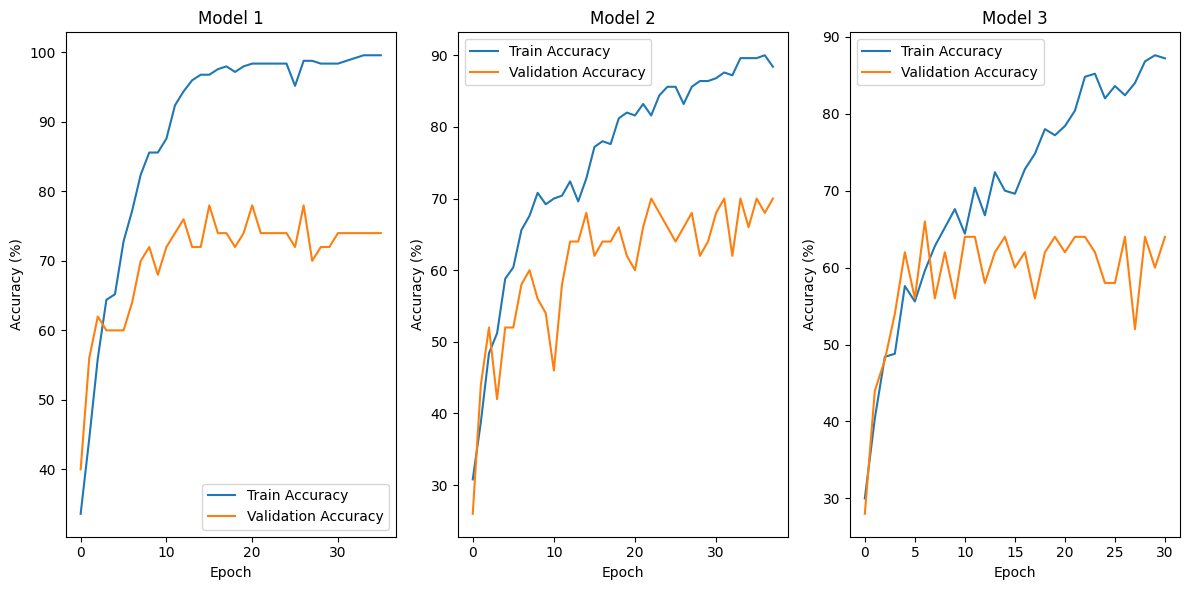

In [14]:
from torchsummary import summary

# Model 1 Summary
print("Model 1 Summary:")
summary(model1, (3, 224, 224))

# Model 2 Summary
print("\nModel 2 Summary:")
summary(model2, (3, 224, 224))

# Model 3 Summary
print("\nModel 3 Summary:")
summary(model3, (3, 224, 224))


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.plot(train_list1, label='Train Accuracy')
plt.plot(val_list1, label='Validation Accuracy')
plt.title('Model 1')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(train_list2, label='Train Accuracy')
plt.plot(val_list2, label='Validation Accuracy')
plt.title('Model 2')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(train_list3, label='Train Accuracy')
plt.plot(val_list3, label='Validation Accuracy')
plt.title('Model 3')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


#Test Accuracy and Confusion Matrix

Confusion matrix, without normalization


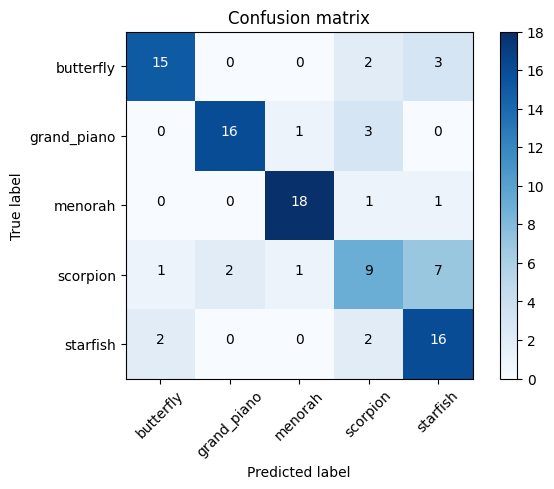

Test Accuracy: 74.00%


In [15]:
def test_model_with_confusion_matrix(model, dataloader, device):
  model.eval()
  all_predictions = []
  all_targets = []
  with torch.no_grad():
    for data, target in dataloader:
      data, target = data.to(device), target.to(device)
      output = model(data)
      _, predicted = torch.max(output.data, 1)
      all_predictions.extend(predicted.cpu().numpy())
      all_targets.extend(target.cpu().numpy())

  cm = confusion_matrix(all_targets, all_predictions)
  plot_confusion_matrix(cm, list(train_data.class_to_idx.keys()))

  correct = 0
  total = len(all_targets)
  for i in range(total):
    if all_predictions[i] == all_targets[i]:
      correct += 1
  test_accuracy = 100 * correct / total
  print(f'Test Accuracy: {test_accuracy:.2f}%')

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.savefig('confusion_matrix.png')
  plt.show()

test_model_with_confusion_matrix(model1, test_dataloader, device)


#Feature maps in each convolution layer

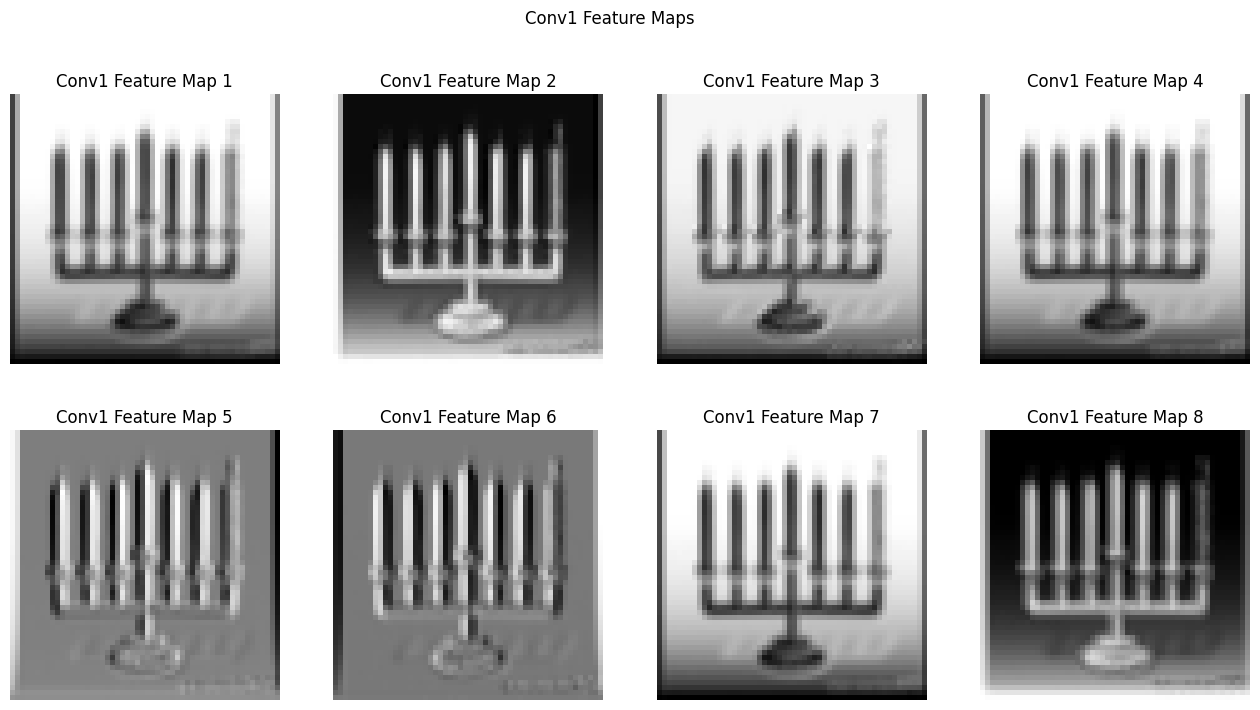

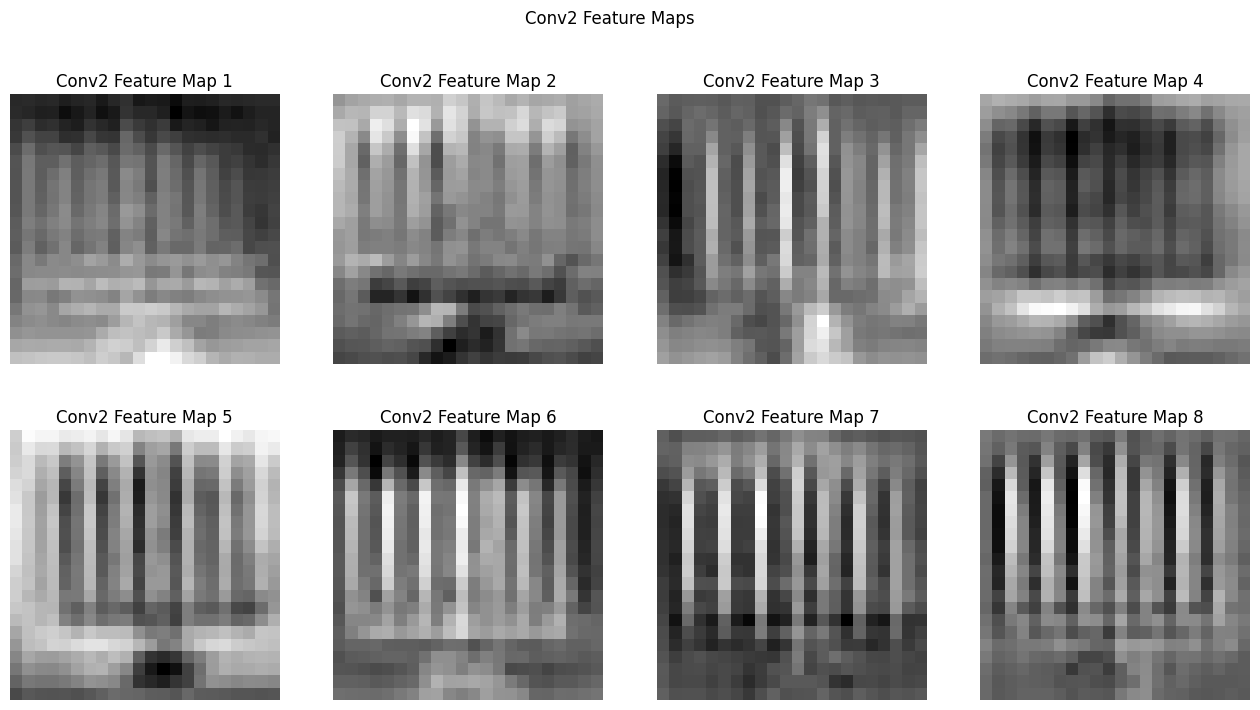

In [16]:
def visualize_feature_maps(model, dataloader, class_label, image_index=0):

  model.eval()
  with torch.no_grad():
    for data, target in dataloader:
      for i in range(len(target)):
        if target[i] == class_label:
          if image_index == 0:
            image = data[i].unsqueeze(0).to(device)
            break
          else:
            image_index -= 1
      else:
        continue
      break

    x = model.conv1(image)
    conv1_feature_maps = x.cpu().numpy()[0]

    x = model.pool1(x)
    x = model.conv2(x)
    conv2_feature_maps = x.cpu().numpy()[0]

    plt.figure(figsize=(16, 8))
    for i in range(8):
      plt.subplot(2, 4, i + 1)
      plt.imshow(conv1_feature_maps[i], cmap='gray')
      plt.title(f'Conv1 Feature Map {i+1}')
      plt.axis('off')

    plt.suptitle('Conv1 Feature Maps')
    plt.show()

    plt.figure(figsize=(16, 8))
    for i in range(8):
      plt.subplot(2, 4, i + 1)
      plt.imshow(conv2_feature_maps[i], cmap='gray')
      plt.title(f'Conv2 Feature Map {i+1}')
      plt.axis('off')

    plt.suptitle('Conv2 Feature Maps')
    plt.show()


visualize_feature_maps(model1, test_dataloader, 2)


#Visualisation of patches for maximally activated neuron

Analyzing class 2:


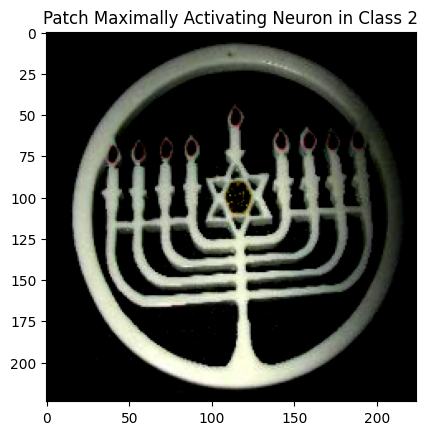

Analyzing class 3:


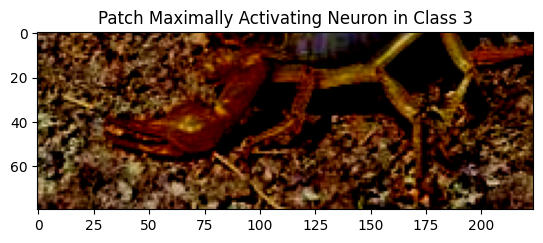

Analyzing class 4:


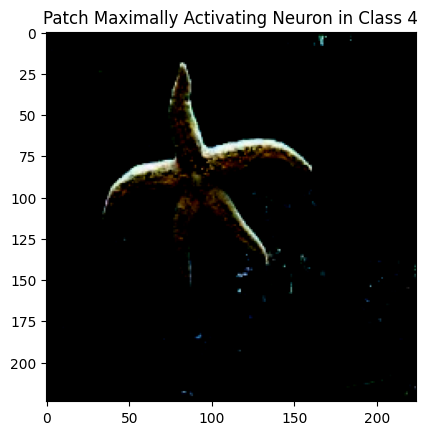

Analyzing class 1:


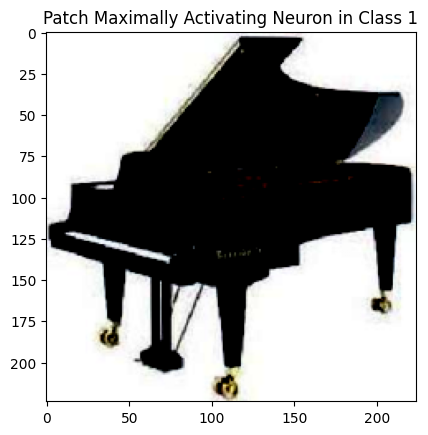

Analyzing class 0:


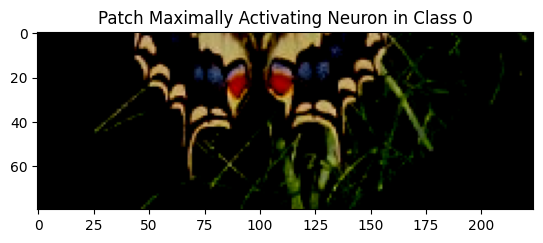

In [17]:
def find_maximally_activating_patches(model, dataloader, device):

  model.eval()
  class_images = {}  # Store one image per class

  with torch.no_grad():
    for data, target in dataloader:
      for i in range(len(target)):
        label = target[i].item()
        if label not in class_images:
          class_images[label] = data[i].unsqueeze(0).to(device)
          break

  for class_label, image in class_images.items():
    print(f"Analyzing class {class_label}:")

    # Forward pass until the last convolutional layer
    x = model.conv1(image)
    x = model.pool1(x)
    x = model.conv2(x)
    x = model.pool2(x)
    x = model.conv3(x)
    x = model.pool3(x)

    max_activation_value = torch.max(x)
    max_activation_index = torch.argmax(x)

    neuron_channel = max_activation_index // (x.shape[2] * x.shape[3])
    neuron_row = (max_activation_index % (x.shape[2] * x.shape[3])) // x.shape[3]
    neuron_col = (max_activation_index % (x.shape[2] * x.shape[3])) % x.shape[3]

    receptive_field_size = 11 * 4 * 2 * 3 * 2 * 3 * 2
    receptive_field_row = neuron_row * 2 * 3 * 2 * 3 * 2
    receptive_field_col = neuron_col * 2 * 3 * 2 * 3 * 2

    patch = image[0, :, receptive_field_row:receptive_field_row + receptive_field_size,
                 receptive_field_col:receptive_field_col + receptive_field_size].cpu().numpy()

    plt.figure()
    plt.imshow(np.transpose(patch, (1, 2, 0)))
    plt.title(f"Patch Maximally Activating Neuron in Class {class_label}")
    plt.show()

find_maximally_activating_patches(model2, train_dataloader, device)
